In [82]:
# Import required libraries to read file and data manipulation
import pandas as pd
import numpy as np

# Path to the Excel file
file_path = 'ADTA-5340 covid-19 nursing home resident and staff vaccination rates.xlsx'

# Reading the Excel file

vaccine = pd.read_excel(file_path, skiprows=3)

# Display the first 5 rows of the DataFrame
vaccine.head()


,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,Passed Quality Assurance Check,Recent Percentage of Residents Up to Date with Vaccines1,Recent Percentage of Staff Up to Date with Vaccines2,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19,Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines
0,'015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,89.286,86.42,0,87,0,5,0,70,0,0
1,'015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,Talladega,Y,Y,37.662,0,0,92,0,2,0,170,0,0
2,'015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,Jackson,Y,Y,37.5,0,2,46,0,3,0,106,2,2
3,'015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,Jefferson,Y,Y,94.366,25.51,0,127,0,2,0,138,0,0
4,'015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,Jefferson,N,NaN,2.105,2.484,0,116,0,0,0,52,0,0


In [83]:
# Renmae the columns for easy access 
vaccine.columns
vaccine = vaccine.rename(columns={'Federal Provider Number':'FP_Number','Provider Name':'P_Name','Provider Address':'P_Address','Provider City':'P_City','Provider State':'P_State','Provider Zip Code':'P_Zipcode',
       'Provider Phone Number':'P_PhNumber','Passed Quality Assurance Check':'Passed_QA_Check',
       'Recent Percentage of Residents Up to Date with Vaccines1':'Res_Vaccinated',
       'Recent Percentage of Staff Up to Date with Vaccines2':'Staff_Vaccinated',
       'Residents Weekly Confirmed COVID-19':'Res_WConf_Cases',
       'Residents Total Confirmed COVID-19':'Res_TotConf_Cases',
       'Residents Weekly COVID-19 Deaths':'Res_WDeath', 'Residents Total  COVID-19 Deaths':'Res_TotDeath',
       'Staff Weekly Confirmed COVID-19':'Staff_WConf', 'Staff Total Confirmed COVID-19':'Staff_TotConf',
       'Residents Hospitalizations with Confirmed COVID-19':'Res_Hospital_conf',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines':'Res_HospitalConf & Vaccinated'})
# print the number of rows and columns(size) of the dataset 
print('\nrows and columns:',vaccine.shape)


rows and columns: (14835, 20)


In [84]:
# replace blank spaces with nan in the dataset
vaccine.replace(['', ' '], np.nan, inplace=True)

# Print the number of null values in each column
null_counts = vaccine.isnull().sum()
print(null_counts)

FP_Number                           0
P_Name                              0
P_Address                           0
P_City                              0
P_State                             0
P_Zipcode                           0
P_PhNumber                          0
County                              0
Submitted Data                      0
Passed_QA_Check                  1494
Res_Vaccinated                    776
Staff_Vaccinated                  771
Res_WConf_Cases                   169
Res_TotConf_Cases                 169
Res_WDeath                        169
Res_TotDeath                      169
Staff_WConf                       169
Staff_TotConf                     169
Res_Hospital_conf                 169
Res_HospitalConf & Vaccinated     169
dtype: int64


C:\Users\sbhuv\AppData\Local\Temp\ipykernel_6928\1595856991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vaccine.replace(['', ' '], np.nan, inplace=True)


In [85]:
# show the data types of the columns 
vaccine.dtypes

FP_Number                         object
P_Name                            object
P_Address                         object
P_City                            object
P_State                           object
P_Zipcode                          int64
P_PhNumber                         int64
County                            object
Submitted Data                    object
Passed_QA_Check                   object
Res_Vaccinated                   float64
Staff_Vaccinated                 float64
Res_WConf_Cases                  float64
Res_TotConf_Cases                float64
Res_WDeath                       float64
Res_TotDeath                     float64
Staff_WConf                      float64
Staff_TotConf                    float64
Res_Hospital_conf                float64
Res_HospitalConf & Vaccinated    float64
dtype: object

In [86]:
# determine the numerical columns used for analysis
vaccine_num_col = [
    'Res_Vaccinated',
    'Staff_Vaccinated',
    'Res_WConf_Cases',
    'Res_TotConf_Cases',
    'Res_WDeath',
    'Res_TotDeath',
    'Staff_WConf',
    'Staff_TotConf',
    'Res_Hospital_conf',
    'Res_HospitalConf & Vaccinated'
]

# Fill the missing numerical values with the mean of their respective columns
vaccine[vaccine_num_col] = vaccine[vaccine_num_col].fillna(vaccine[vaccine_num_col].mean())

# Find the mode value of Passes_QA_Check categorical column
mode_value = vaccine['Passed_QA_Check'].mode()[0]
print(f"Mode value for 'Passed_QA_Check': {mode_value}")

# Replace NaN values in 'Passed_QA_Check' with the mode value
vaccine['Passed_QA_Check'].fillna(mode_value, inplace=True)

# Confirm that all missing values have been replaced with mean and mode
print(vaccine.isnull().sum())


Mode value for 'Passed_QA_Check': Y
FP_Number                        0
P_Name                           0
P_Address                        0
P_City                           0
P_State                          0
P_Zipcode                        0
P_PhNumber                       0
County                           0
Submitted Data                   0
Passed_QA_Check                  0
Res_Vaccinated                   0
Staff_Vaccinated                 0
Res_WConf_Cases                  0
Res_TotConf_Cases                0
Res_WDeath                       0
Res_TotDeath                     0
Staff_WConf                      0
Staff_TotConf                    0
Res_Hospital_conf                0
Res_HospitalConf & Vaccinated    0
dtype: int64


C:\Users\sbhuv\AppData\Local\Temp\ipykernel_6928\2499187711.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccine['Passed_QA_Check'].fillna(mode_value, inplace=True)


In [87]:
# summary statistics for all numeric features used for analysis

# Filter the DataFrame to include only the columns of interest
vaccine_numdata = vaccine[vaccine_num_col]

# Display summary statistics
summary_statistics = vaccine_numdata.describe()
summary_statistics


,Res_Vaccinated,Staff_Vaccinated,Res_WConf_Cases,Res_TotConf_Cases,Res_WDeath,Res_TotDeath,Staff_WConf,Staff_TotConf,Res_Hospital_conf,Res_HospitalConf & Vaccinated
count,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000
mean,30.883065,10.009142,0.250989,138.432906,0.002727,11.476203,0.171621,129.114551,0.016433,0.003341
std,26.684873,19.139866,1.653419,90.753985,0.056819,12.765097,0.842811,79.948964,0.152070,0.064040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.545000,0.000000,0.000000,78.000000,0.000000,4.000000,0.000000,79.000000,0.000000,0.000000
50%,30.435000,2.878000,0.000000,124.000000,0.000000,9.000000,0.000000,114.000000,0.000000,0.000000
75%,50.662500,10.009142,0.000000,180.000000,0.000000,16.000000,0.000000,160.000000,0.000000,0.000000
max,100.000000,100.000000,51.000000,3924.000000,2.000000,593.000000,25.000000,1875.000000,4.000000,3.000000


In [88]:
# Display basic information and the first few rows of the dataset
print(vaccine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FP_Number                      14835 non-null  object 
 1   P_Name                         14835 non-null  object 
 2   P_Address                      14835 non-null  object 
 3   P_City                         14835 non-null  object 
 4   P_State                        14835 non-null  object 
 5   P_Zipcode                      14835 non-null  int64  
 6   P_PhNumber                     14835 non-null  int64  
 7   County                         14835 non-null  object 
 8   Submitted Data                 14835 non-null  object 
 9   Passed_QA_Check                14835 non-null  object 
 10  Res_Vaccinated                 14835 non-null  float64
 11  Staff_Vaccinated               14835 non-null  float64
 12  Res_WConf_Cases                14835 non-null 

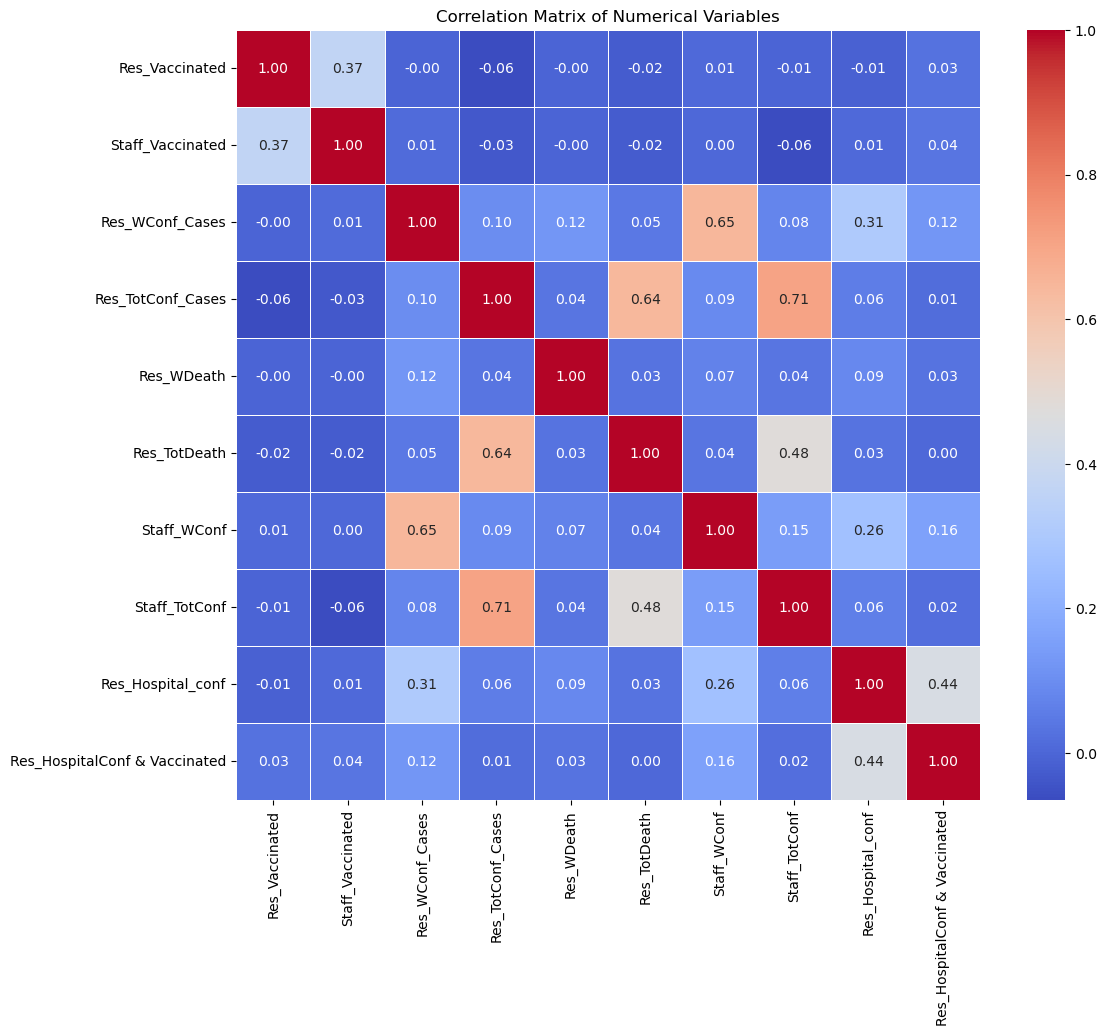

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only the numerical columns to show the plot
vaccine_num_col = vaccine.select_dtypes(include=[np.number]).columns

# drop Zipcode and Phone number columns which are not required for analysis
vaccine_num_col = vaccine_num_col.drop(['P_Zipcode', 'P_PhNumber'])

# Fetch the correlation matrix for numerical columns
correlation_matrix = vaccine[vaccine_num_col].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

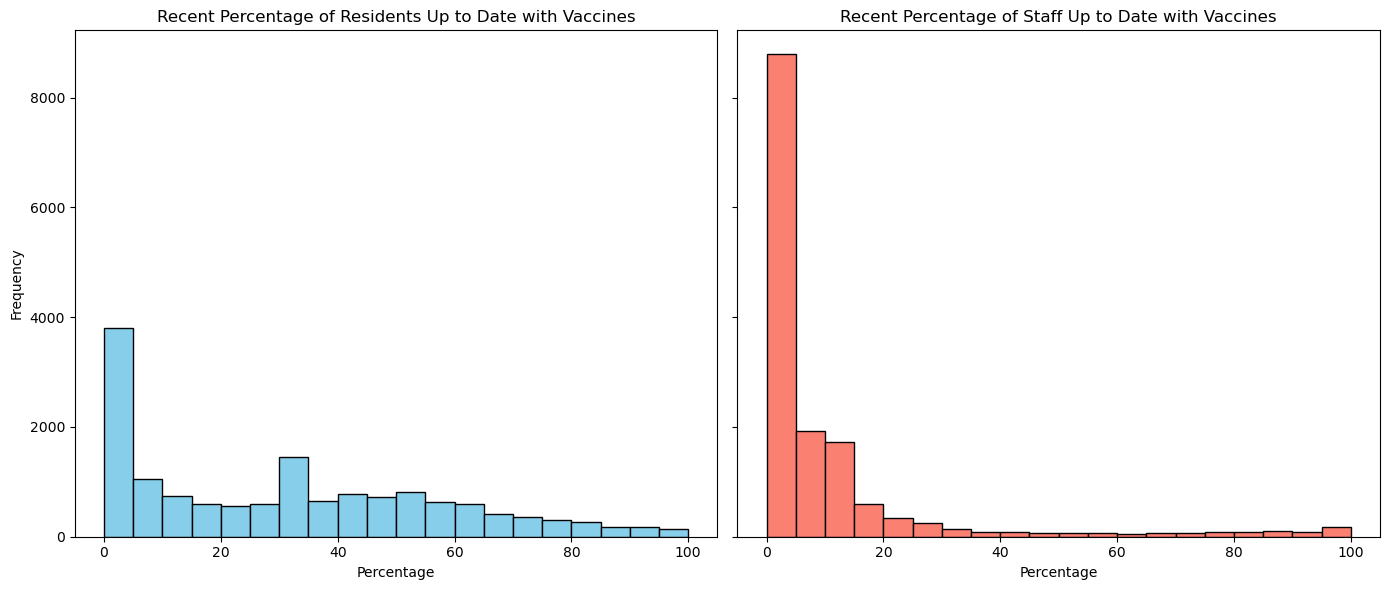

In [90]:
# Plot the histogram with 2 plots 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for Residents Vaccinated
axes[0].hist(vaccine['Res_Vaccinated'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Recent Percentage of Residents Up to Date with Vaccines')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Frequency')

# Histogram for Staff Vaccinated
axes[1].hist(vaccine['Staff_Vaccinated'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Recent Percentage of Staff Up to Date with Vaccines')
axes[1].set_xlabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

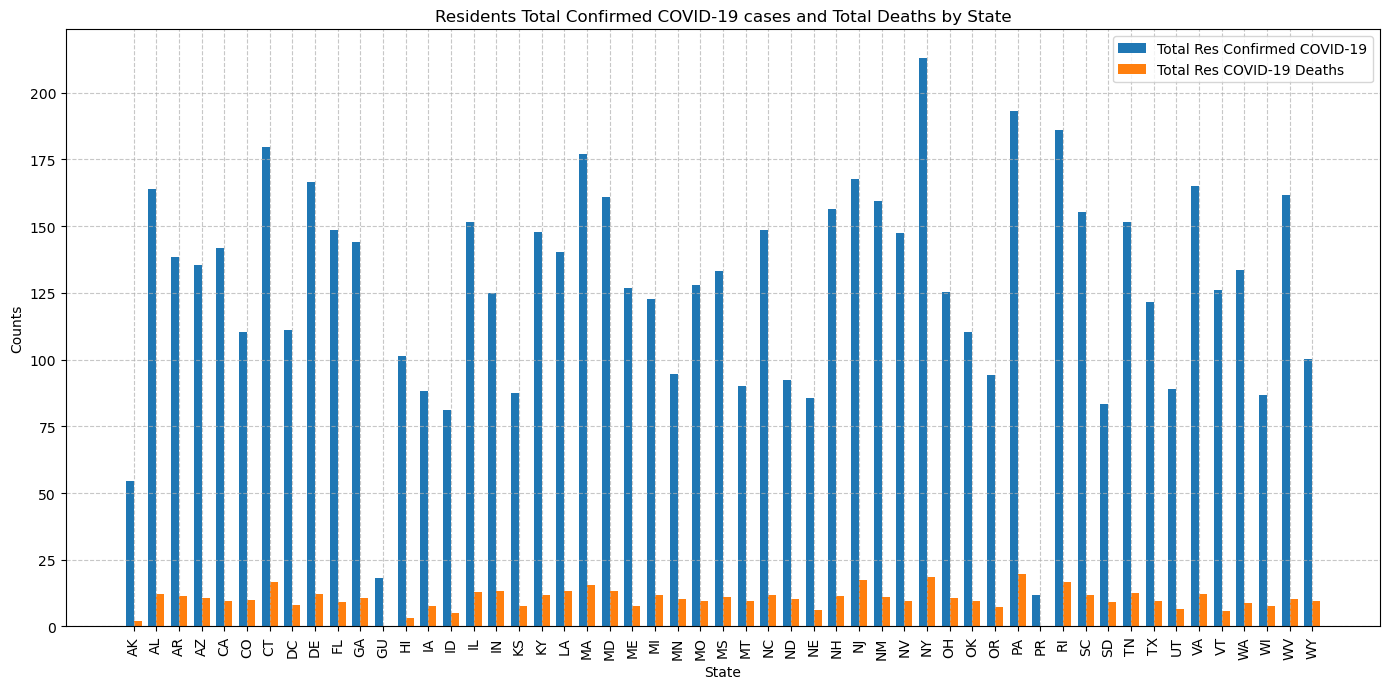

In [91]:
# Group by 'P_State' and calculate the mean for each state
state_grouped = vaccine.groupby('P_State').agg({
    'Res_TotConf_Cases': 'mean',
    'Res_TotDeath': 'mean'
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the bars for each metric
bar_width = 0.35
index = range(len(state_grouped))

bars1 = ax.bar(index, state_grouped['Res_TotConf_Cases'], bar_width, label='Total Res Confirmed COVID-19')
bars2 = ax.bar([i + bar_width for i in index], state_grouped['Res_TotDeath'], bar_width, label='Total Res COVID-19 Deaths')

# Adding labels, title, and legend
ax.set_xlabel('State')
ax.set_ylabel('Counts')
ax.set_title('Residents Total Confirmed COVID-19 cases and Total Deaths by State')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(state_grouped['P_State'], rotation=90)
ax.legend()

# Adding grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

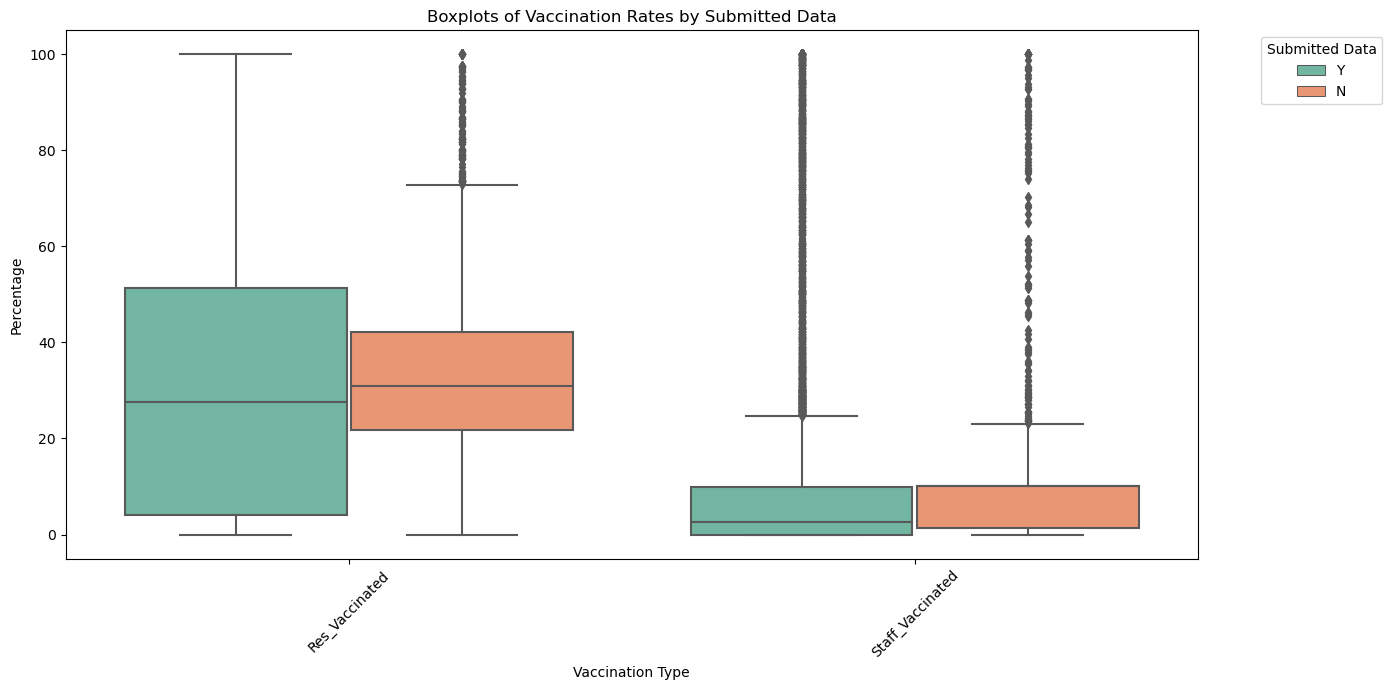

In [94]:
# Boxplot of vaccination rates based on submitted data
boxplot_data = vaccine[['Submitted Data', 'Res_Vaccinated', 'Staff_Vaccinated']]

# Melt the DataFrame to long format for seaborn
boxplot_data_melted = pd.melt(boxplot_data, id_vars=['Submitted Data'], value_vars=['Res_Vaccinated', 'Staff_Vaccinated'],
                              var_name='Vaccination Type', value_name='Percentage')

# Create the boxplots
plt.figure(figsize=(14, 7))

sns.boxplot(x='Vaccination Type', y='Percentage', hue='Submitted Data', data=boxplot_data_melted, palette='Set2')

plt.xlabel('Vaccination Type')
plt.ylabel('Percentage')
plt.title('Boxplots of Vaccination Rates by Submitted Data')
plt.legend(title='Submitted Data', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

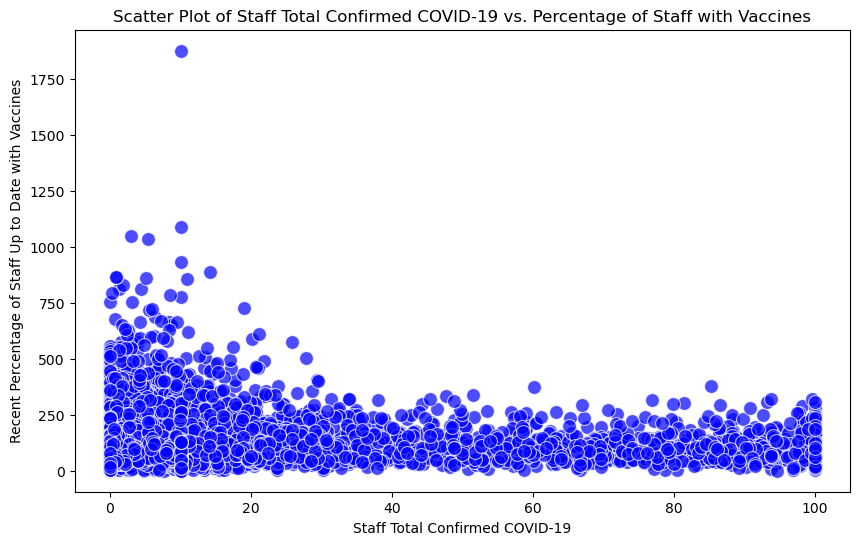

In [101]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot using seaborn
sns.scatterplot(x='Staff_Vaccinated', y='Staff_TotConf', data=vaccine, alpha=0.7, s=100, color='b')

plt.xlabel('Staff Total Confirmed COVID-19')
plt.ylabel('Recent Percentage of Staff Up to Date with Vaccines')
plt.title('Scatter Plot of Staff Total Confirmed COVID-19 vs. Percentage of Staff with Vaccines')
plt.show()

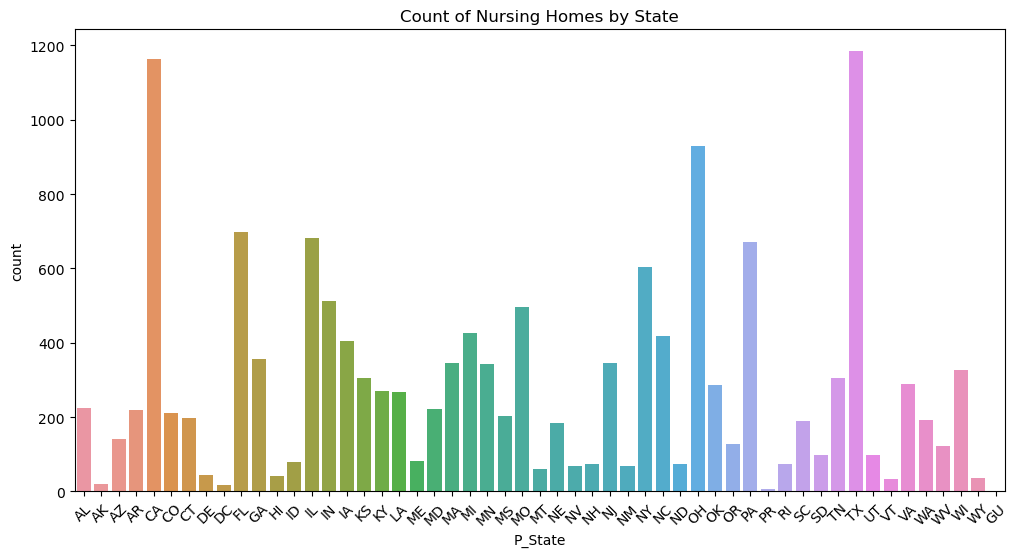

In [96]:
# Count plot for a categorical variable (example: 'Provider State')
plt.figure(figsize=(12, 6))
sns.countplot(x='P_State', data=vaccine)
plt.title('Count of Nursing Homes by State')
plt.xticks(rotation=45)
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [120]:
# consider the target variable as percentage of Residents vaccinated  and create binary target variable for more than 50% residents are up to date with vaccines
vaccine['Target'] = (vaccine['Res_Vaccinated'] > 50).astype(int)

# Select predictor variables using numerical columns
X = vaccine[['P_Zipcode', 'Staff_Vaccinated']]
y = vaccine['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print('\n',X_test.head())
print('\n',y_train.head())
print('\n',y_test.head())

       P_Zipcode  Staff_Vaccinated
13246      54481             7.527
6491       56514             0.000
6802       39069            15.152
5025       42303             0.000
4238       51028            18.644

        P_Zipcode  Staff_Vaccinated
2609       30120             1.329
4046       47714            10.390
12451      22003             1.277
7076       63801             0.000
9448       44203             0.000

 13246    0
6491     0
6802     0
5025     0
4238     0
Name: Target, dtype: int32

 2609     0
4046     1
12451    0
7076     0
9448     0
Name: Target, dtype: int32


In [124]:
from sklearn.preprocessing import StandardScaler
# Initialize and apply the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive Bayes Accuracy: 0.7617121671722279
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      2196
           1       0.63      0.20      0.30       771

    accuracy                           0.76      2967
   macro avg       0.70      0.58      0.58      2967
weighted avg       0.74      0.76      0.71      2967

Mean Squared error: 0.23828783282777216


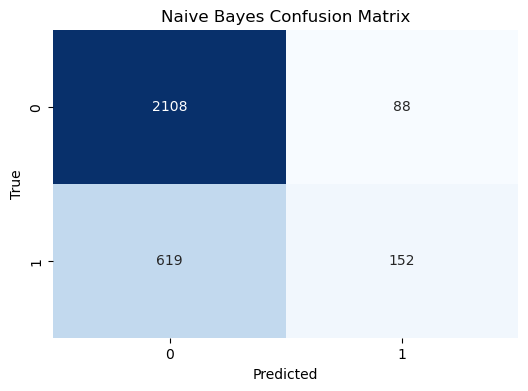

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate the classifier
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


# Calculate MSE
mse = mean_squared_error(y_test,y_pred_nb)
print('Mean Squared error:', mse)


# Compute and plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

Linear Regression Accuracy: 0.7593528816986855

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2196
           1       0.65      0.16      0.26       771

    accuracy                           0.76      2967
   macro avg       0.71      0.57      0.56      2967
weighted avg       0.74      0.76      0.70      2967

Mean Squared error: 0.24064711830131447

Linear Regression Confusion Matrix:
[[2128   68]
 [ 646  125]]


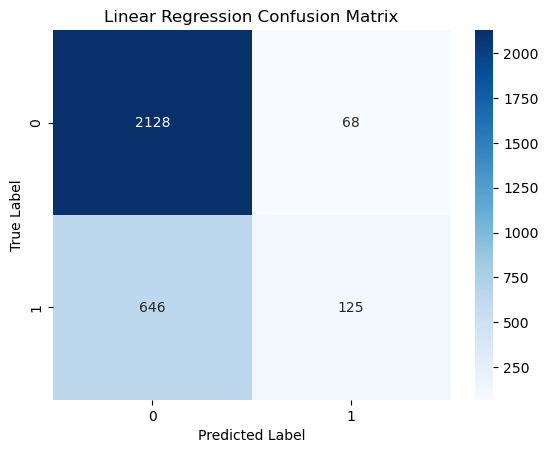

In [145]:
from dmba import regressionSummary, exhaustive_search
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model (output will be continuous and not binary)
y_pred_continuous = model.predict(X_test)

# Convert continuous predictions to binary predictions for classification purposes
y_pred_binary = np.where(y_pred_continuous > 0.5, 1, 0)  # Threshold at 0.5


# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Linear Regression Accuracy:", accuracy) 

# Classification report
cr = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(cr)

# Calculate MSE
mse = mean_squared_error(y_test,y_pred_binary)
print('Mean Squared error:', mse)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("\nLinear Regression Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Linear Regression Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.683855746545332
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2196
           1       0.39      0.38      0.39       771

    accuracy                           0.68      2967
   macro avg       0.59      0.59      0.59      2967
weighted avg       0.68      0.68      0.68      2967

Mean Squared error: 0.316144253454668


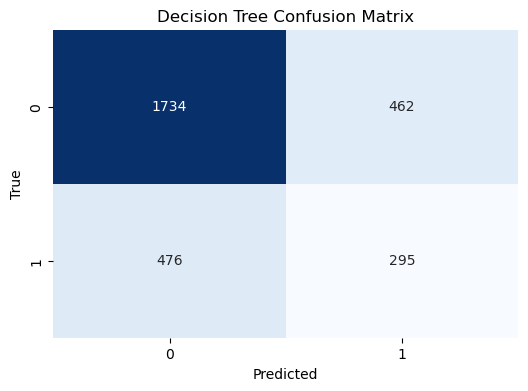

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the classifier
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Calculate MSE
mse = mean_squared_error(y_test,y_pred_dt)
print('Mean Squared error:', mse)

# Compute and plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Logistic Regression Accuracy: 0.7600269632625548
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2196
           1       0.65      0.16      0.26       771

    accuracy                           0.76      2967
   macro avg       0.71      0.57      0.56      2967
weighted avg       0.74      0.76      0.70      2967

Mean Squared error: 0.23997303673744524


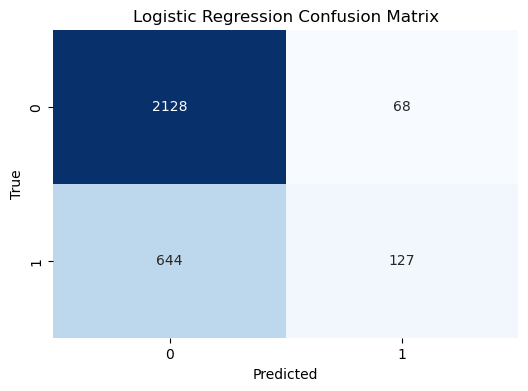

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Calculate MSE
mse = mean_squared_error(y_test,y_pred_log_reg)
print('Mean Squared error:', mse)

# Compute and plot the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.7172227839568588
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2196
           1       0.44      0.32      0.37       771

    accuracy                           0.72      2967
   macro avg       0.61      0.59      0.59      2967
weighted avg       0.69      0.72      0.70      2967

Mean Squared error: 0.2827772160431412
Confusion Matrix:
[[1885  311]
 [ 528  243]]


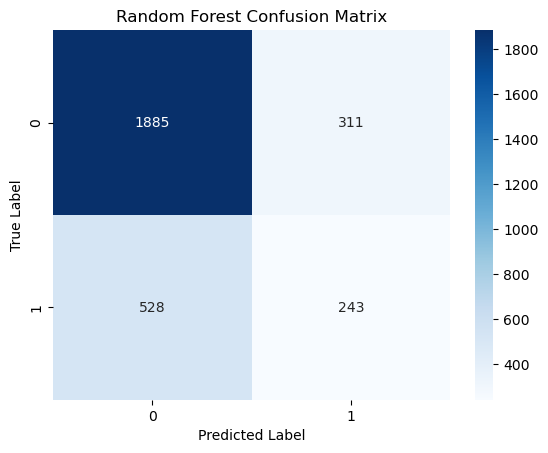

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(X_train, y_train)

# Predict using the model (output will be class labels directly, no need for probabilities)
y_pred_binary = model.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Random Forest Accuracy:", accuracy)


# Classification report
cr = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(cr)

# Calculate MSE
mse = mean_squared_error(y_test,y_pred_binary)
print('Mean Squared error:', mse)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()



KNN Accuracy: 0.722278395685878
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83      2196
           1       0.43      0.21      0.28       771

    accuracy                           0.72      2967
   macro avg       0.60      0.56      0.55      2967
weighted avg       0.68      0.72      0.69      2967

Mean Squared error: 0.277721604314122


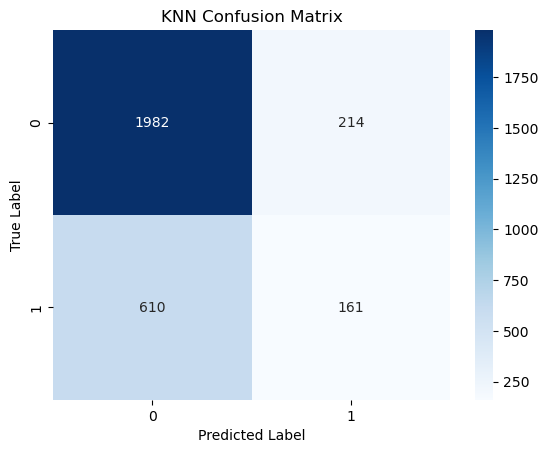

In [143]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Print classification report and accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


mse = mean_squared_error(y_test,y_pred_knn)
print('Mean Squared error:', mse)

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

Multi-Layer Perceptron Accuracy: 0.760701044826424
Multi-Layer Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      2196
           1       0.63      0.19      0.29       771

    accuracy                           0.76      2967
   macro avg       0.70      0.57      0.57      2967
weighted avg       0.74      0.76      0.71      2967

Mean Squared error: 0.239298955173576


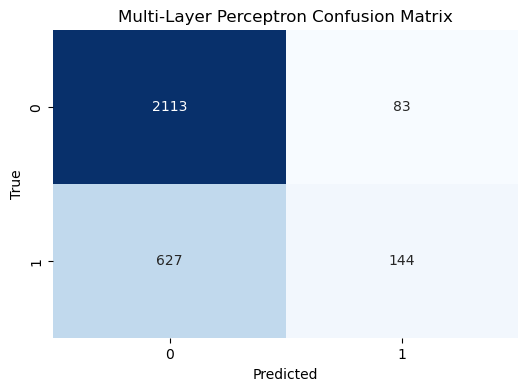

In [144]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the classifier
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the classifier
print("Multi-Layer Perceptron Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Multi-Layer Perceptron Classification Report:")
print(classification_report(y_test, y_pred_mlp))

mse = mean_squared_error(y_test,y_pred_mlp)
print('Mean Squared error:', mse)

# Compute and plot the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multi-Layer Perceptron Confusion Matrix')
plt.show()

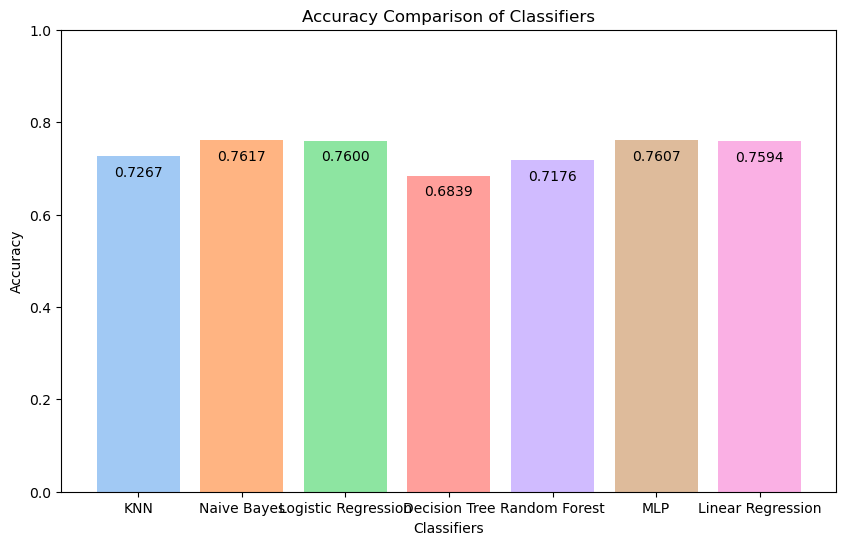

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined and correctly scaled

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Linear Regression": LinearRegression()  # Assuming it's used as a classifier with binary thresholding
}

# Initialize lists to store accuracies
accuracies = []

# Loop through classifiers
for name, clf in classifiers.items():
    if name == "Linear Regression":
        # Train Linear Regression and convert to binary predictions
        clf.fit(X_train, y_train)
        y_pred_continuous = clf.predict(X_test)
        y_pred = np.where(y_pred_continuous > 0.5, 1, 0)  # Threshold at 0.5 for binary classification
    else:
        # Train other classifiers and make predictions
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(classifiers))
bars = plt.bar(classifiers.keys(), accuracies, color=colors)

# Add labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim([0.0, 1.0])

# Add values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, f"{acc:.4f}", ha='center', va='bottom', color='black', fontsize=10)

plt.show()
